# **Final Project** 
### Taxi Motor Collisions in New York City

It is no lie. The yellow driving vehicles are some of the scariest things in New York. The narrow passages between cars and the hangry taxi driver do not make it any less scary. I avoided the taxi ride in New York from my own experience, which made me wonder: How often do the NYC taxis crash? And what would be the reason behind it? And is there something we can do to avoid these crashes? 


### The application

Because of technical difficulties when publishing the app, I have decided to create GIFs that show the website. The website consists of three filters at the top: year, month, and day, making it possible for the user to filter based on specific preferences. I have structured the application by asking the questions: when, where, and why. The first row contains the "when" question, where we see three histograms of collisions by year, month, and day. The three histograms are distributed by the New York City boroughs, which can be filtered on the visualizations. The next row shows the "where" visualizations, which contain an overview of collisions in each borough and a map that shows the exact location. The map has categorized the locations and will show details as you zoom into the map. The last row is the "what" section, which shows the reasons were behind the collision. The latter leads to the previous visualization, which shows the consequences of these collisions. All of the visualizations are connected to the filters at the top, which makes the application dynamic and interactive.



<img src="https://media.giphy.com/media/eEnwa51B9FeaNFtulK/giphy.gif" width="850" height="850"/>

# 1. Motivation

### What is your dataset?
To answer the questions from above, I have chosen the "Motor Vehicle Collisions crash dataset" from NYC open source, [which you can find here.](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95) It contains all motor vehicle collision crashes reported by the police in New York City, where someone is injured, killed, or where there is at least $1000 worth of damage. The dataset contains observations from 2013-2021 and is updated weekly. The dataset contains 1.7mil rows and 29 features, making it possible to experiment with the data. Since the Covid19 outbreak, the crash reports have decreased drastically due to the lockdowns in NYC. 


### Why did you choose this/these particular dataset(s)? 
The idea of using data to improve and possibly save lives is the reason why I have chosen this dataset. This dataset contains all the relevant attributes needed for analyzing a crash based on location and crash type. In this project, the main goal is to identify where most taxi crashes happen in NYC to make more efficient location-targeted safety improvements, such as road signs or campaigns. 

### What was your goal for the end user's experience? 
My main goal with an interactive dashboard is to give the end-user the freedom to navigate through the data as they wish. This kind of freedom to learn at your own pace is, in my opinion, one of the most effective methods to make the end-user a part of the storytelling. Besides that, I want the end-user to arrive at different results through their creativity by enabling them to filter in the data.

# 2. Basic stats

### Write about your choices in data cleaning and preprocessing

The cleaning process of the dataset:
* The dataset contains many kinds of vehicle types. I have therefore filtered the dataset only to collect taxi data. There were about 1.7mil rows. After filtering, the dataset only contained 74k rows.
* I have added four new time columns: I divided the date column into an hour, day, month, and year, to make time-related visualizations.
* I removed NaNs from the locations column to make it possible to visualization a map of taxi collisions.
* Renaming some of the columns for easier handling

### Libraries, cleaning and dataset

In [11]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
from dash.dependencies import Input, Output
import plotly.express as px
import folium

import numpy as np
import matplotlib.pyplot as plt
import datetime

from jupyter_dash import JupyterDash
import dash_bootstrap_components as dbc
from folium.plugins import MarkerCluster
import pandas as pd
from IPython import display

In [25]:
#Importing the dataset using pandas. Converting zip code and vehicle type columns to strings:
df = pd.read_csv("/Users/coco/Desktop/MotorCol.csv",dtype={'ZIP CODE': 'string','CONTRIBUTING FACTOR VEHICLE 1':'string'})


#Splitting the date column into three: DAY, MONTH and YEAR
df[["DAY", "MONTH", "YEAR"]] = df["CRASH DATE"].str.split("/", expand = True)


#Importing time column, which combined the date with time column
df['time'] = pd.to_datetime(df['CRASH DATE'] + " " + df['CRASH TIME'])


#Preparing the map with data function
now = datetime.datetime.now()
earliest_date = now - datetime.timedelta(hours=24*38)


#Importing hour and month column to the dataset
df['Hour']=pd.DatetimeIndex(df['time']).hour
df['Month']=pd.DatetimeIndex(df['time']).month

#Renaming the columns
df.rename(columns = {'CONTRIBUTING FACTOR VEHICLE 1':'Reason'}, inplace = True)
df.rename(columns = {'NUMBER OF PERSONS INJURED':'PersonsInjured'}, inplace = True)
df.rename(columns = {'NUMBER OF PERSONS KILLED':'PersonsKilled'}, inplace = True)
df.rename(columns = {'NUMBER OF MOTORIST INJURED':'MotoristInjured'}, inplace = True)
df.rename(columns = {'NUMBER OF MOTORIST KILLED':'MotoristKilled'}, inplace = True)

#Overview of the dataset:
df[:5]


,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DAY,MONTH,YEAR,time,Hour,Month
0,04/14/2021,5:32,NaN,<NA>,NaN,NaN,NaN,BRONX WHITESTONE BRIDGE,NaN,NaN,...,Sedan,NaN,NaN,NaN,04,14,2021,2021-04-14 05:32:00,5,4
1,04/13/2021,21:35,BROOKLYN,11217,40.68358,-73.97617,"(40.68358, -73.97617)",NaN,NaN,620 ATLANTIC AVENUE,...,NaN,NaN,NaN,NaN,04,13,2021,2021-04-13 21:35:00,21,4
2,04/15/2021,16:15,NaN,<NA>,NaN,NaN,NaN,HUTCHINSON RIVER PARKWAY,NaN,NaN,...,NaN,NaN,NaN,NaN,04,15,2021,2021-04-15 16:15:00,16,4
3,04/13/2021,16:00,BROOKLYN,11222,NaN,NaN,NaN,VANDERVORT AVENUE,ANTHONY STREET,NaN,...,NaN,NaN,NaN,NaN,04,13,2021,2021-04-13 16:00:00,16,4
4,04/12/2021,8:25,NaN,<NA>,0.00000,0.00000,"(0.0, 0.0)",EDSON AVENUE,NaN,NaN,...,Sedan,NaN,NaN,NaN,04,12,2021,2021-04-12 08:25:00,8,4


### Preprocessing of map

In [7]:
#Removing NaNs of the latitude and longitude column
df2 = df['LATITUDE'].isna() | (df['LONGITUDE'] == '0.0000000')

#Dataframe with the lat and long columns
dfll = df.loc[~df2]

stage_df = dfll[dfll['time'] > earliest_date]

When plotting the map, it was clear that a lot of the longitude and latitude values were missing. The missing values could have an impact on the result, as they could potentially change the outcome of the analysis.

# 3. Data Analysis 

### Describe your data analysis and explain what you've learned about the dataset. 
In the following section, I have chosen to make GIFs representing my dashboard website because of publishing issues. I have structured the dashboard by asking the following questions: when, where, what.

### When?
The first row of the dashboard represents the question: When? When did the collision happen? What year, day, and time was it? 

### Collisions by year
The graph below shows the collisions through the years 2012-2021. All the boroughs except Manhattan follows the same pattern of a decrease in accidents throughout the years and they top in 2013. This might be because of the driving service Über, that was launched in 2011 in NYC and is used more in the boroughs outside Manhattan. It is also clear that 2020 and 2021 have a lot fewer accidents because of the COVID-19 lockdowns, where most people stayed inside instead of driving around NYC in taxis. There are about 80.000 uber drivers compared to the 13.500 taxi drivers driving in New York City, which makes the decrease on the bar chart reasonable throughout the years. The year 2012 has few observations compared to the other years because the observation only is from half the year. Regarding Manhattan 2018 is the year where most of the accidents happened. 

<img src="https://media.giphy.com/media/YLv0F8RoKmyX3S9fzh/giphy.gif" width="850" height="850"/>



### Collisions by day of the month
When looking at the graph that shows the collision count based on the day of the month, there is a clear pattern regarding Brooklyn, Queens, Bronx, and State Island, as we also saw in the ‘year’ graph. Most accidents happen at the beginning of the month, and as we come near the end of the month, the accidents decrease. This might be due to payday and that the nearer to the end of the month, the fewer money people have and therefore skip the taxi ride home. In Manhattan, the pattern is opposite, but this also makes sense as Manhattan is the most tourist-infested borough.

<img src="https://media.giphy.com/media/BSvGuU37QCjPgrL6TY/giphy.gif" width="850" height="850"/>



Something interesting about this graph is Christmas day (25. December) as seen on the image below (filtered by December), where people stay home and celebrate instead of being out driving in taxis. The 31st has a decrease in accidents as it is not all months that have 31 days.   



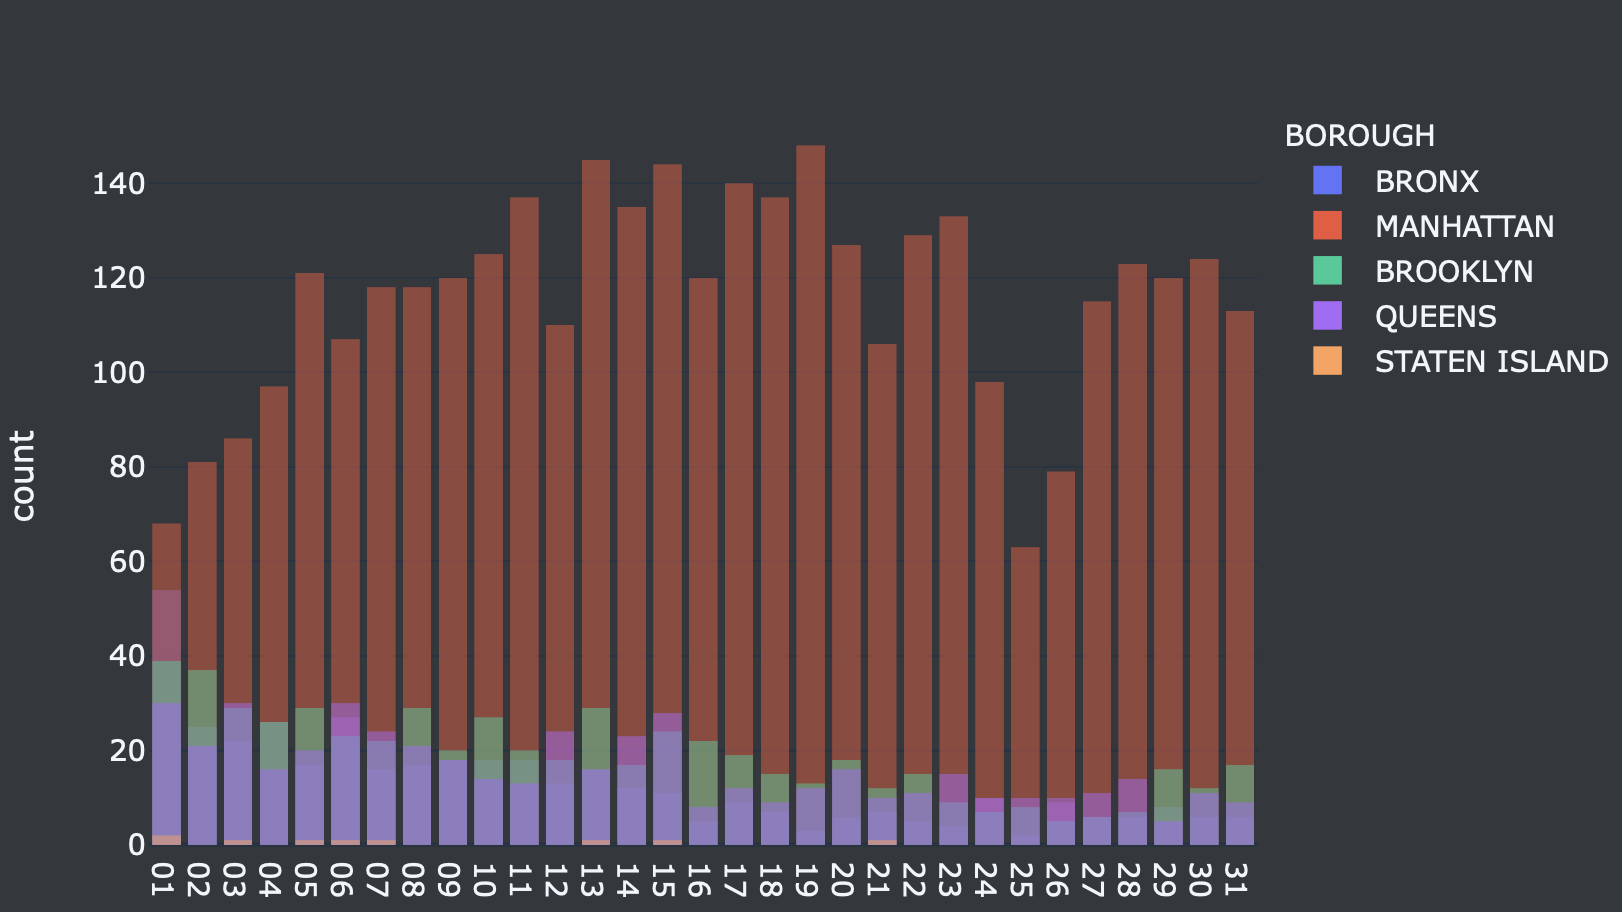

In [28]:
display.Image("/Users/coco/Desktop/December.jpeg",width="800")

### Collisions by hour
The hour graph shows the distribution of collisions throughout a whole day. It is clear that most accidents happen around rush hour, where most people usually go home from work. Interestingly, most crashes occurring at night occur in other boroughs than Manhattan, which may be the police who reported the accident dates as 00:00 to indicate that they happened on a specific day. Regarding Staten Island we cannot interpret anything because the sample size is low. This might be due to the fact that they have the lowest population inhabitants.  


<img src="https://media.giphy.com/media/DT0dp125twbduRKnDZ/giphy.gif" width="850" height="850"/>




### Time comparison
As we can see on the overview image, I have filtered out Manhattan. When looking at the other boroughs, we can see that they follow a pattern as if they are the same borough. It is interesting how well these boroughs follow each other's pattern, compared to Manhattan, which has the opposite pattern: an increasing rate through time. We can conclude that Manhattan stands out, again, as expected.  
 

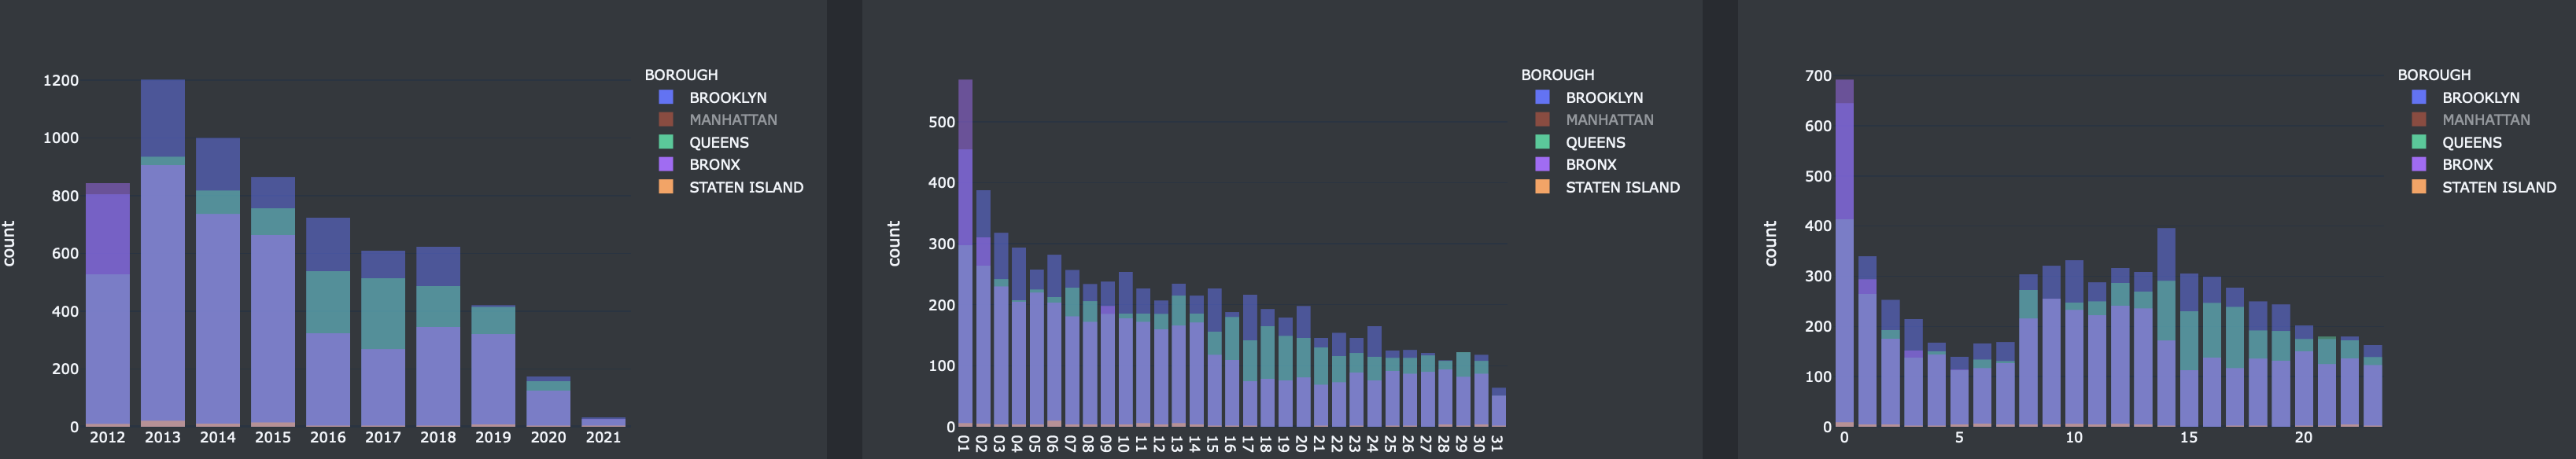

In [14]:
display.Image("/Users/coco/Desktop/Sammenligning.jpeg",width="6000")

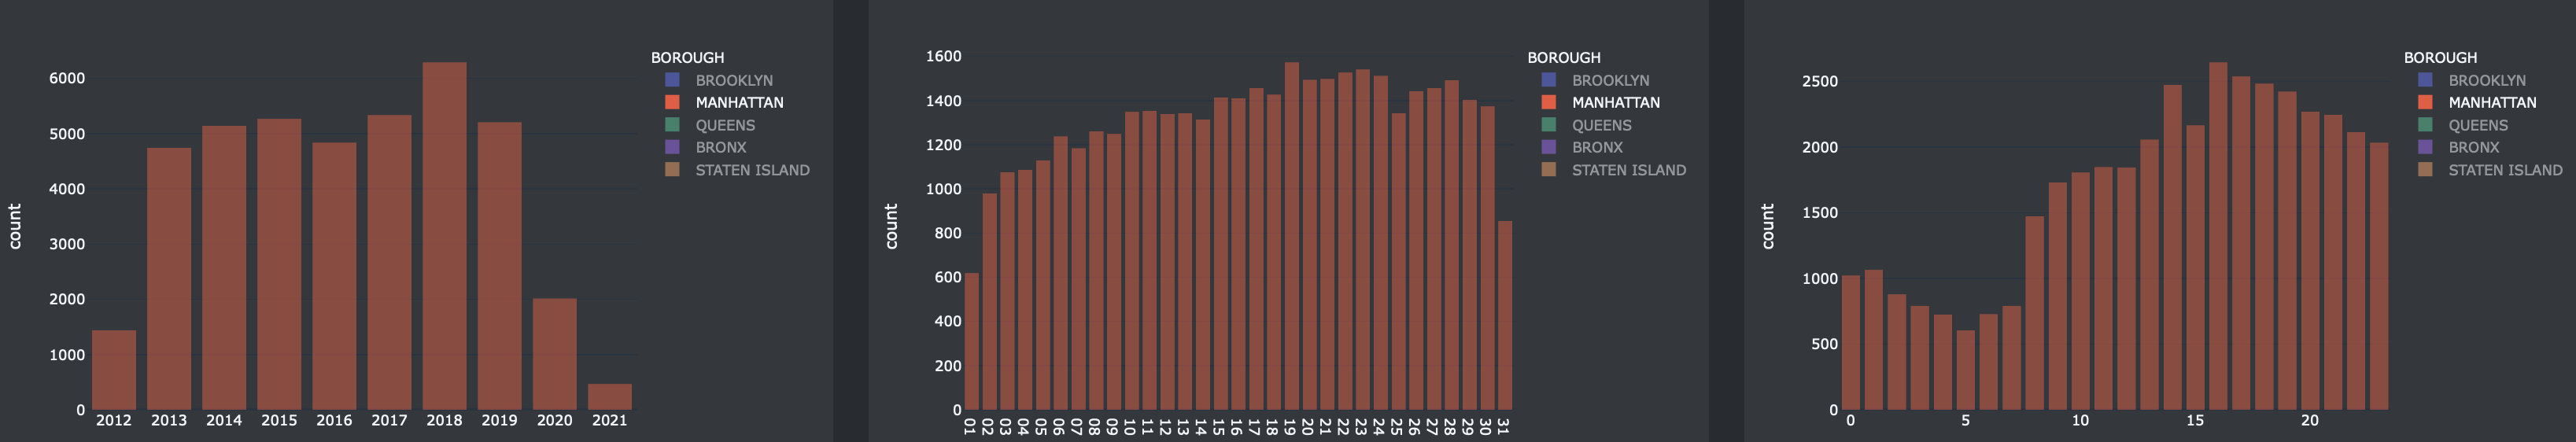

In [16]:
display.Image("/Users/coco/Desktop/Sammenligning2.jpeg",width="6000")

## Where?
The second row represents the question: where? Which borrow has the highest collision rate, and where is the collision located precisely? 

### Collisions by borough
By looking at the taxi collision count for the different boroughs, we can see that most of the accidents happen in Manhattan. Considering that Manhattan is the city with most taxis in NYC, it makes sense that most of the collisions happen there. It is interesting that the biggest boroughs have lower accident rates than one of the smallest boroughs which is Manhattan. It still makes sense since Manhattan is known for being a tourist borough and the traffic in this borough is usually more extreme. 


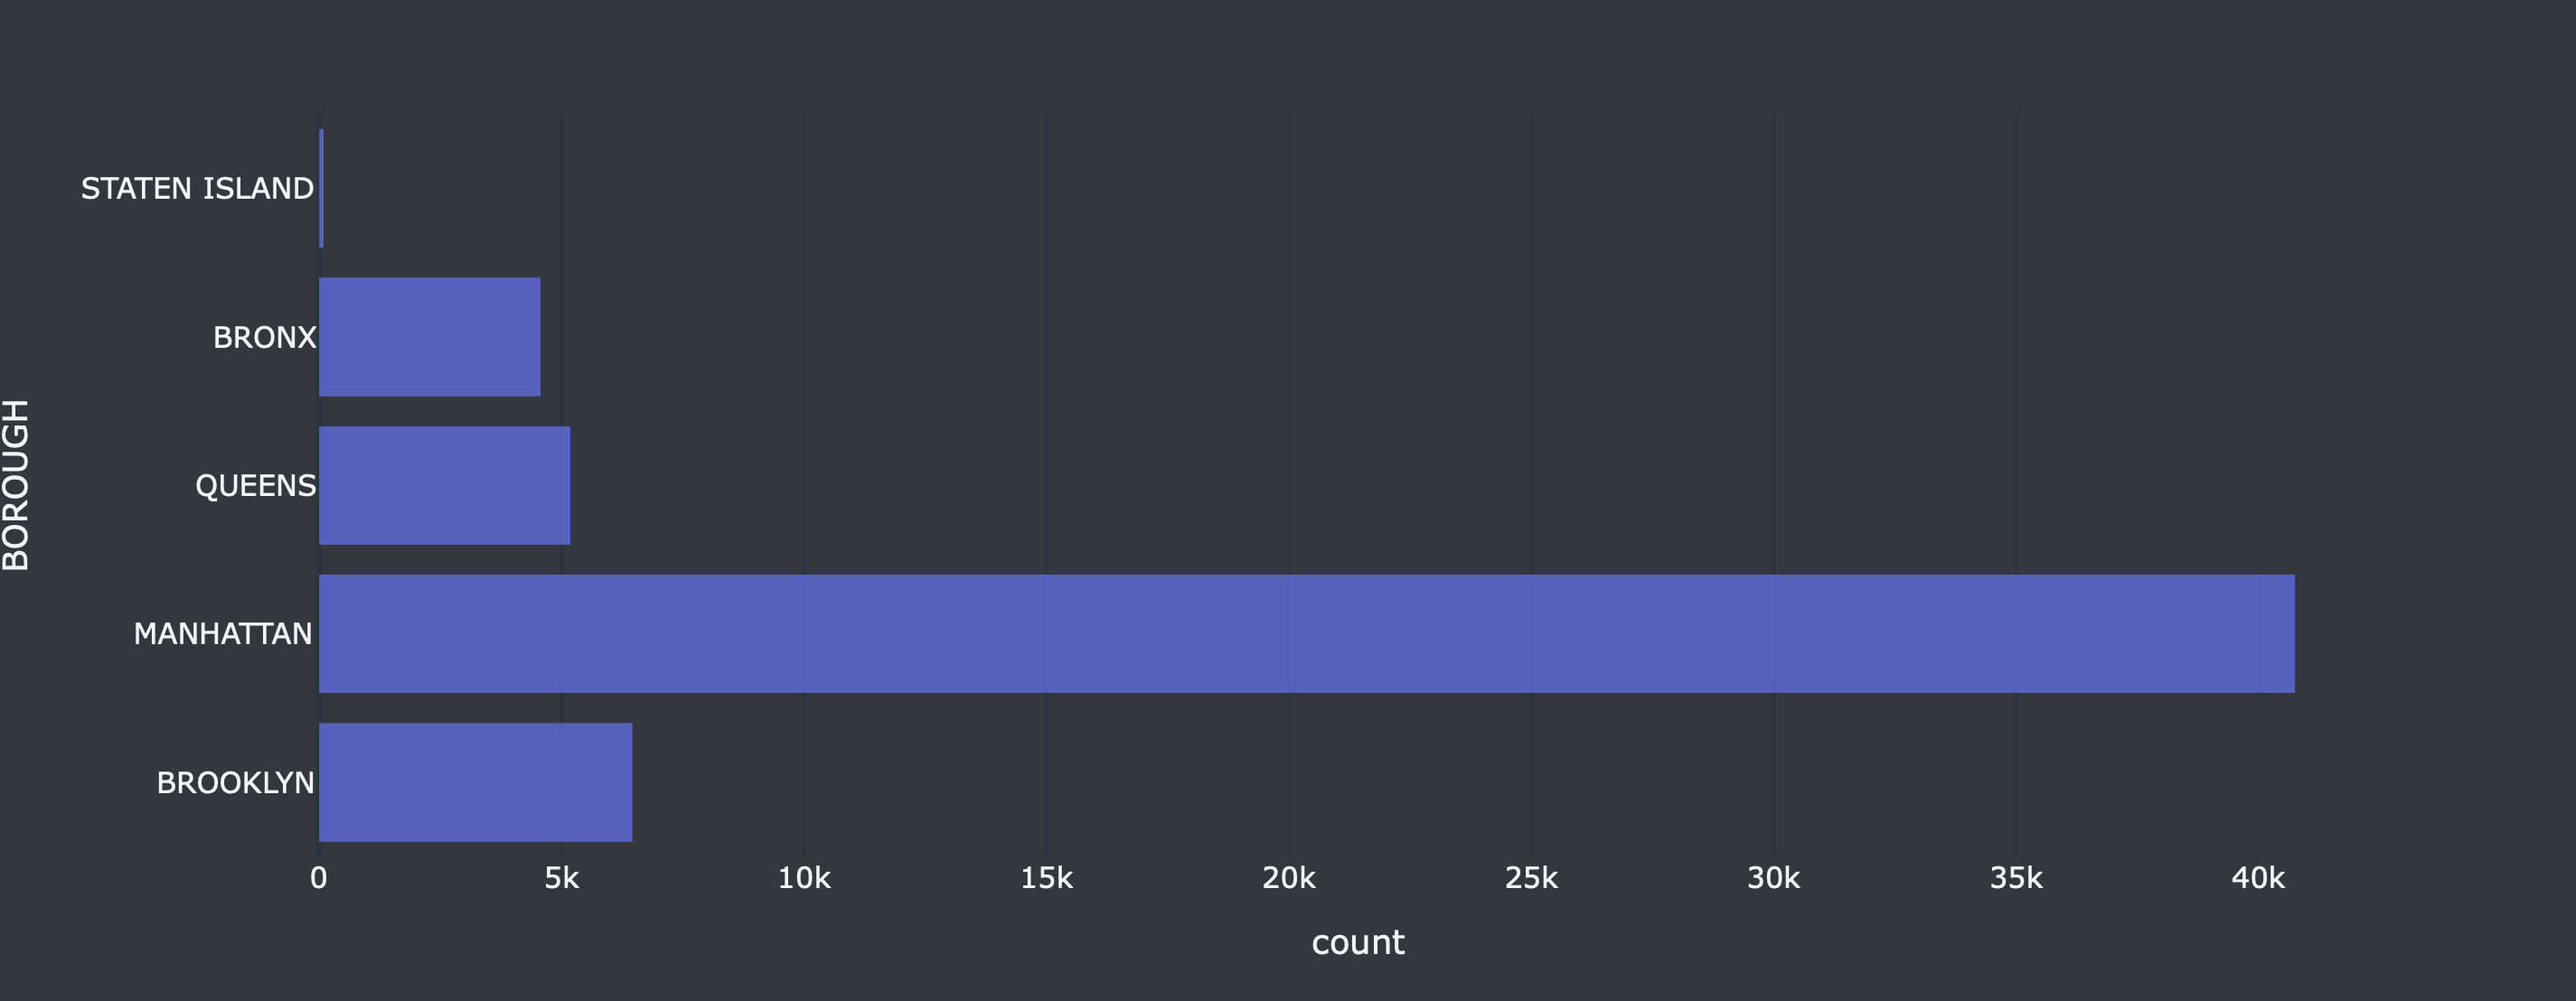

In [29]:
display.Image("/Users/coco/Desktop/Borough.jpeg",width="6000")

### Collision map
The map is constructed such that the accidents are grouped. When zooming in we can see more accidents and their exact location. As seen on the GIF, Manhattan has the highest collision rate as expected. As mentioned earlier there are some observations without location data which have been removed from the dataset. This could maybe have given other results. As seen on the GIF most of the accidents are located near intersections which can be a result of failure to yield as the reason graph also shows. It can be very interesting when plotting the locations on a map, as it can be used to decide where a suitable place would be to put up aware signs to reduce the number of taxi collisions.


<img src="https://media.giphy.com/media/arcJto2uazoSIHTNiT/giphy.gif" width="850" height="850"/>







## What?
The second row represents the question: what? What is the reason for the taxi collision? What are the consequences of these collisions?

### Reasons for taxi collisions
The most common reason for accidents is when the driver gets distracted. The reason for the distraction is unfortunately unspecified, but most distractions when driving happen because of phones. Next comes failure to yield right-of-way, which is common mistake taxi drivers make as their job requires hurrying and reaching a destination within a given time. 

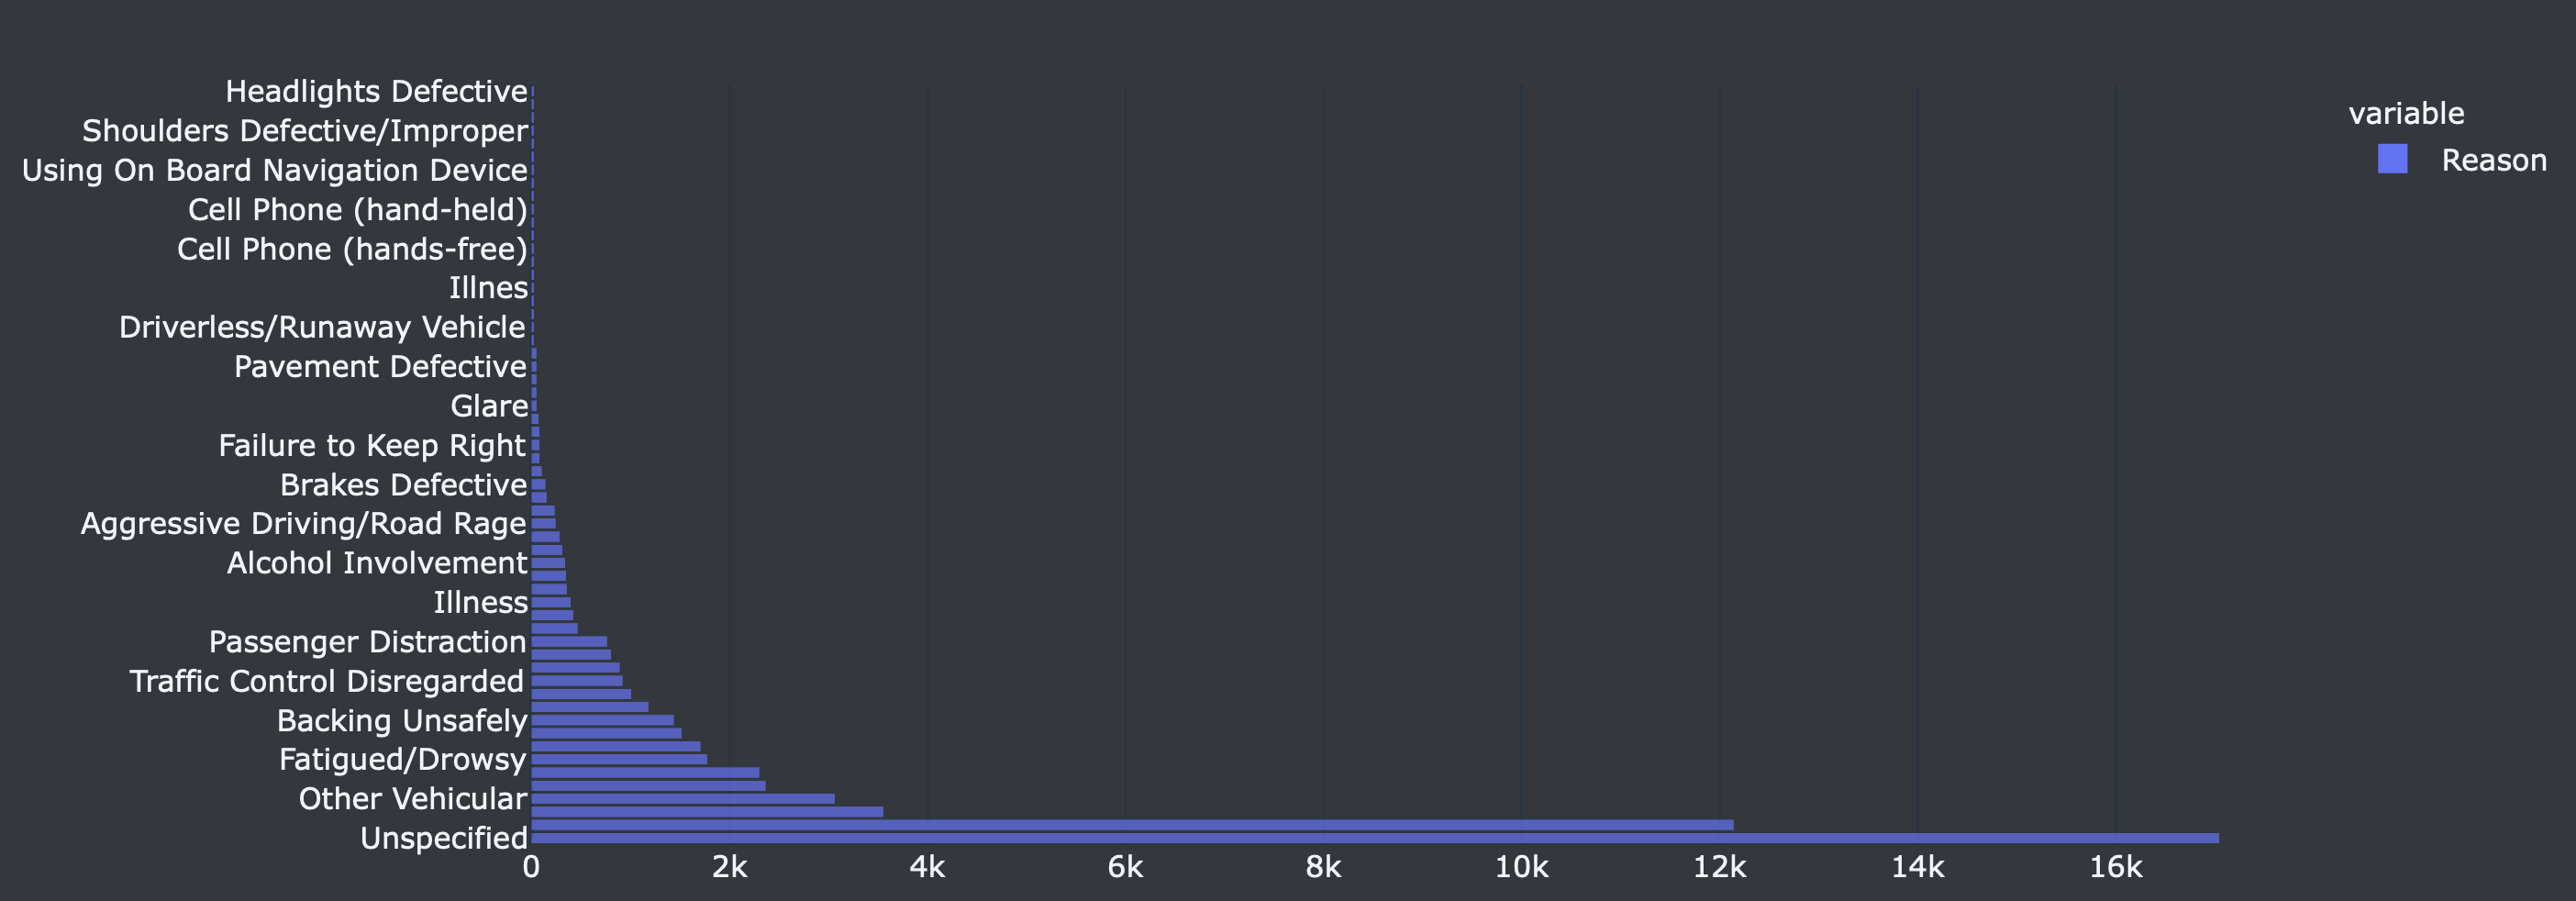

In [24]:
display.Image("/Users/coco/Desktop/Reason.jpeg",width="800")

### The qonsequenses of the collisions
As we see on the GIF, when comparing the number of persons killed and injured (0=not killed or injured due to accident), there are not many people who die due to taxi accidents. The number of injured people is higher than the death rate, making the probability of getting injured due to a taxi accident 1/7. When comparing the number of injured and killed motorists, we get the same pattern, but the motorists are less likely to get injured than non-motorists.



<img src="https://media.giphy.com/media/sUg7Shb4EH8NQ0cs6n/giphy.gif" width="850" height="850"/>



# 4. Genre
The interactive dashboard used in this project follows the annotated chart visualization genre.  I have used this type of visualization as I believe that interactive learning helps the reader learn more efficiently.  

  

For this purpose, the narrative structure follows the reader-driven approach, which has no prescribed ordering and no messaging. It gives the reader freedom to interact with the visualizations, which is the project's primary purpose. 

# 5. Visualizations
I have mainly used bar charts in the dash app because they give the reader the ability to compare easily while providing a quick overview. As we learned in the course, visualizations such as pie charts and charts with angles make it challenging to interpret the result as it can be difficult to distinguish the angle size. The filtering in the graphs makes it possible to compare different boroughs in the same visualization, making it even easier to compare and interpret it.  

Besides the bar graphs, I have also used a map to plot the exact collision locations. But instead of showing all collisions spread out, I have made it such that the reader can zoom in and thereby see either the exact location or total amount of collisions in a given borough. 

# 6. Discussion
The data used in this project was easy to handle and did not need major changes. Besides that, the cleaning that was made did not take much time and was also easy to manage. Even though it is my first time using Plotly, it went as planned, and I am satisfied with the result. 

Even though the project went as planned, there is still space for improvements. As mentioned in project A, I wanted to add weather data to do machine learning for prediction reasons. 

Besides that, the project could be improved by analyzing the exact crash locations to see if it is right-swing accidents or other pattern-related accidents. 

Last but not least, the publication of the website could be simpler, as I experienced major issues in the process. 

# 7. Contributions
Working alone

# 8. References
https://www.taxiinsurer.co.uk/contact-us/news/how-has-uber-affected-the-taxi-industry/

http://vis.stanford.edu/files/2010-Narrative-InfoVis.pdf

https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95

Edward Segel and Jeffrey Heer. Narrative Visualization: Telling Stories with Data, section 4-5.